# Titanic Survival Prediction and Analysis(Task -2)

In [66]:
# Import necessary Libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,roc_auc_score

import warnings 
warnings.filterwarnings('ignore')

In [67]:
# Load the dataset titanic traininf data
df = pd.read_csv("C:\\Users\\GOURAV NEGI\\Downloads\\titanic\\train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [68]:
# statistical info
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [69]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Exploratory Data Analysis

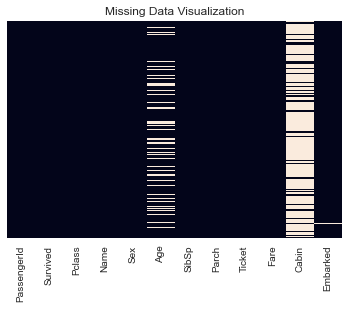

In [71]:
# Missing Data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)
plt.title('Missing Data Visualization')
plt.show()

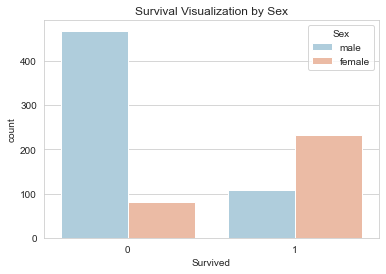

In [47]:
# Visualize survival based on sex
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=df, palette='RdBu_r')
plt.title('Survival Visualization by Sex')
plt.show()

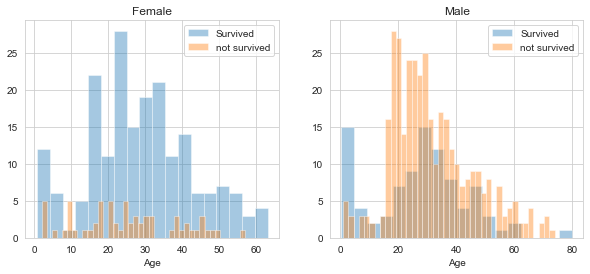

In [14]:
survived = 'Survived'
not_survived = 'not survived'
fig,axes = plt.subplots(nrows = 1 , ncols = 2,figsize=(10,4))
women = df[df['Sex'] == 'female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(),bins=18,
label = survived,ax = axes[0],kde = False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

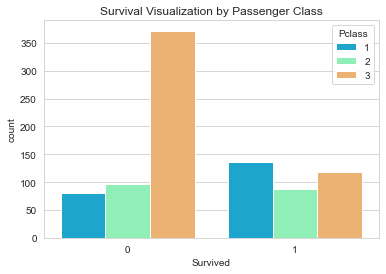

In [72]:
# Visualize survival based on passenger class
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=df, palette='rainbow')
plt.title('Survival Visualization by Passenger Class')
plt.show()

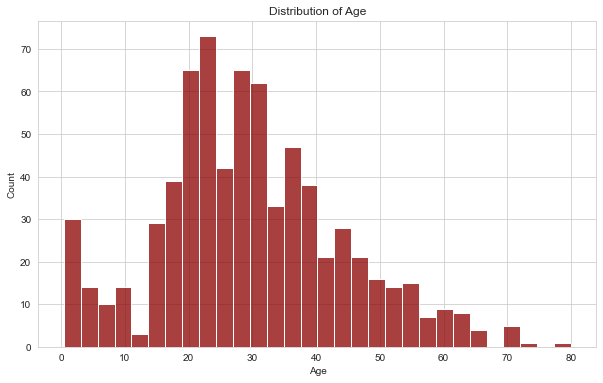

In [73]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df['Age'].dropna(), kde=False, color='darkred', bins=30)
plt.title('Distribution of Age')
plt.show()

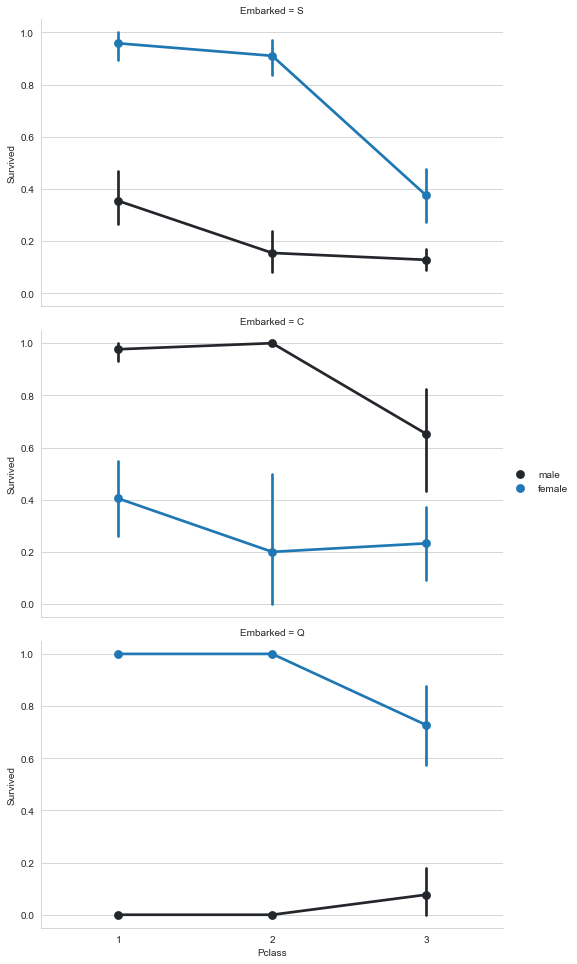

In [74]:
FacetGrid = sns.FacetGrid(df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex',)
FacetGrid.add_legend()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

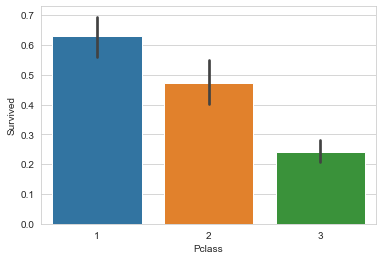

In [75]:
sns.barplot(x = 'Pclass',y = 'Survived',data = df)

# Data Cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

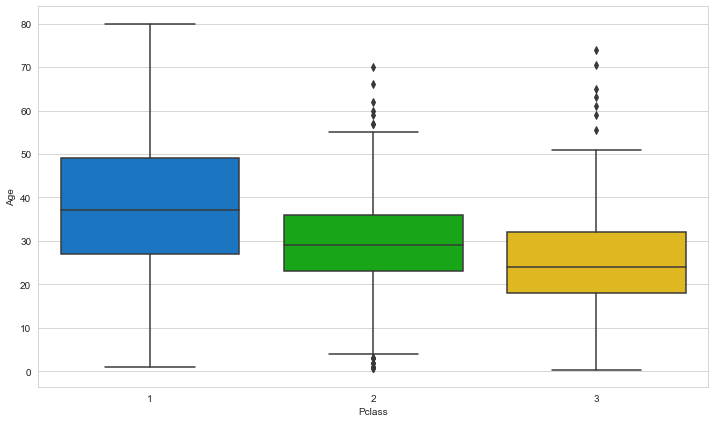

In [76]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y="Age",data = df,palette = 'nipy_spectral')

In [77]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [78]:
#Impute missing age based on passenger class
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age


In [79]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)

In [80]:
# Drop Cabin column and rows with missing Embarked data
df.drop('Cabin', axis=1, inplace=True)
df.dropna(inplace=True)

In [81]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [87]:
X = df.drop(['Survived'],axis=1) 
y = df['Survived']

# LogisticRegression

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [91]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [92]:
# Building a Logistic Regression model
logmodel = LogisticRegression(max_iter=1000)  # Increase max_iter to 1000
logmodel.fit(X_train_scaled, y_train)
predictions = logmodel.predict(X_test_scaled)

In [93]:
# Evaluation
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       109
           1       0.67      0.52      0.59        69

    accuracy                           0.71       178
   macro avg       0.70      0.68      0.68       178
weighted avg       0.71      0.71      0.71       178



In [94]:
# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.71


In [101]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
Y_pred = logreg.predict(X_test)


print("Training ACCuracy :",logreg)
print('Model Accuracy Score :',accuracy)

Training ACCuracy : LogisticRegression()
Model Accuracy Score : 0.7134831460674157


# Standardizing the data

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test,columns = X.columns)

In [96]:
X_train.head()
X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,-0.620393,0.878378,-0.039645,-0.517197,-0.469155,-0.472150
1,-0.024437,-1.527027,-1.158136,0.761428,1.987010,1.699024
2,-1.556895,0.878378,-1.158136,0.761428,-0.469155,-0.406568
3,-0.090224,-0.324324,0.120139,-0.517197,-0.469155,-0.372526
4,0.556040,-1.527027,-0.838567,-0.517197,1.987010,0.917836


# ROC Curve and AUC

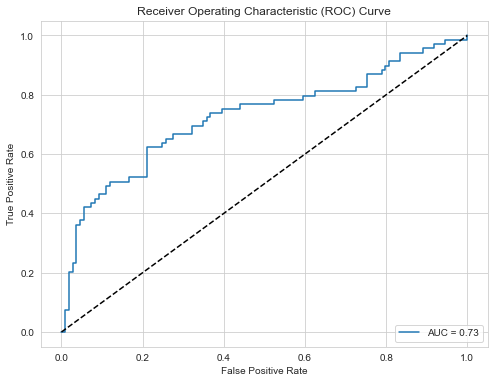

In [102]:
# Calculate predicted probabilities for the positive class
y_pred_prob = logmodel.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()